<a href="https://colab.research.google.com/github/luthra2059/Predicting-Future-Product-Prices-Using-Facebook-Prophet/blob/master/Predicting-Future-Product-Prices-Using-Facebook-Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
avocado_csv = pd.read_csv('/content/avocado.csv')

In [4]:
avocado_csv.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
avocado_csv.shape

(8806, 14)

In [6]:
avocado_csv.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8801,11,2018-01-07,0.85,303963.18,167628.98,10026.09,409.67,125898.44,108075.96,16240.96,1581.52,conventional,2018.0,Nashville
8802,0,2018-03-25,1.04,305105.53,171335.77,20076.04,2425.10,111268.62,94895.33,15963.29,410.00,conventional,2018.0,NewOrleansMobile
8803,1,2018-03-18,1.02,316969.55,181011.25,19002.68,2515.00,114440.62,95470.29,18533.66,436.67,conventional,2018.0,NewOrleansMobile
8804,2,2018-03-11,1.05,316463.18,177320.17,22478.10,2158.00,114506.91,93807.58,20352.66,346.67,conventional,2018.0,NewOrleansMobile
8805,3,2018-03-04,1.03,332378.96,190521.47,24646.65,2564.00,114646.00,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
avocado_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8806 non-null   int64  
 1   Date          8806 non-null   object 
 2   AveragePrice  8806 non-null   float64
 3   Total Volume  8806 non-null   float64
 4   4046          8806 non-null   float64
 5   4225          8806 non-null   float64
 6   4770          8806 non-null   float64
 7   Total Bags    8806 non-null   float64
 8   Small Bags    8805 non-null   float64
 9   Large Bags    8805 non-null   float64
 10  XLarge Bags   8805 non-null   float64
 11  type          8805 non-null   object 
 12  year          8805 non-null   float64
 13  region        8805 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 963.3+ KB


In [8]:
avocado_csv.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,8806.000000,8806.000000,8.806000e+03,8.806000e+03,8.806000e+03,8.806000e+03,8.806000e+03,8.805000e+03,8.805000e+03,8805.000000,8805.000000
mean,24.915739,1.159129,1.602499e+06,5.604999e+05,5.630660e+05,4.572764e+04,4.332052e+05,3.329706e+05,9.429914e+04,5971.613146,2016.080409
std,15.326066,0.265126,4.571666e+06,1.684420e+06,1.620211e+06,1.489493e+05,1.270864e+06,9.692762e+05,3.074670e+05,23469.065973,0.886639
min,0.000000,0.460000,3.369968e+04,7.206000e+01,1.518000e+03,0.000000e+00,3.047170e+03,1.119180e+03,0.000000e+00,0.000000,2015.000000
25%,11.000000,0.980000,1.964016e+05,3.071882e+04,5.095969e+04,5.289300e+02,5.662915e+04,4.276225e+04,2.181760e+03,0.000000,2015.000000
50%,25.000000,1.130000,4.013484e+05,1.031186e+05,1.344967e+05,6.177595e+03,9.650254e+04,7.415979e+04,1.362757e+04,103.880000,2016.000000
75%,38.000000,1.320000,1.017747e+06,3.571675e+05,4.126353e+05,2.187285e+04,2.872228e+05,2.018743e+05,5.795665e+04,2334.140000,2017.000000
max,52.000000,2.220000,6.103446e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.629830e+07,1.256716e+07,4.324231e+06,551693.650000,2018.000000


In [9]:
avocado_csv.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      1
Large Bags      1
XLarge Bags     1
type            1
year            1
region          1
dtype: int64

In [10]:
avocado_csv = avocado_csv.sort_values('Date')

In [11]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

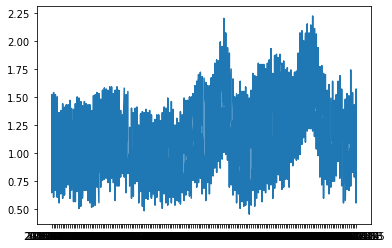

In [12]:
plt.plot(avocado_csv['Date'], avocado_csv['AveragePrice'])

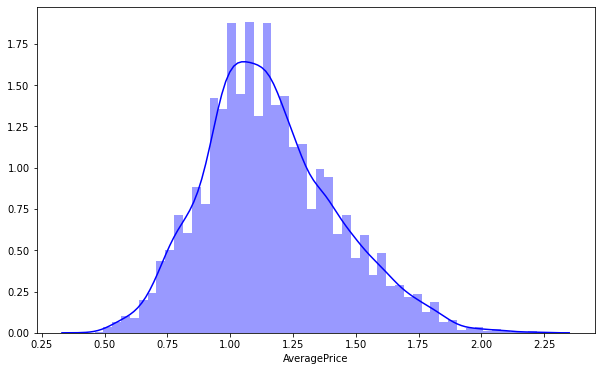

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(avocado_csv['AveragePrice'], color='b')

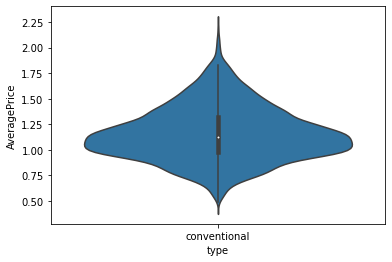

In [16]:
sns.violinplot(y='AveragePrice', x='type', data=avocado_csv)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

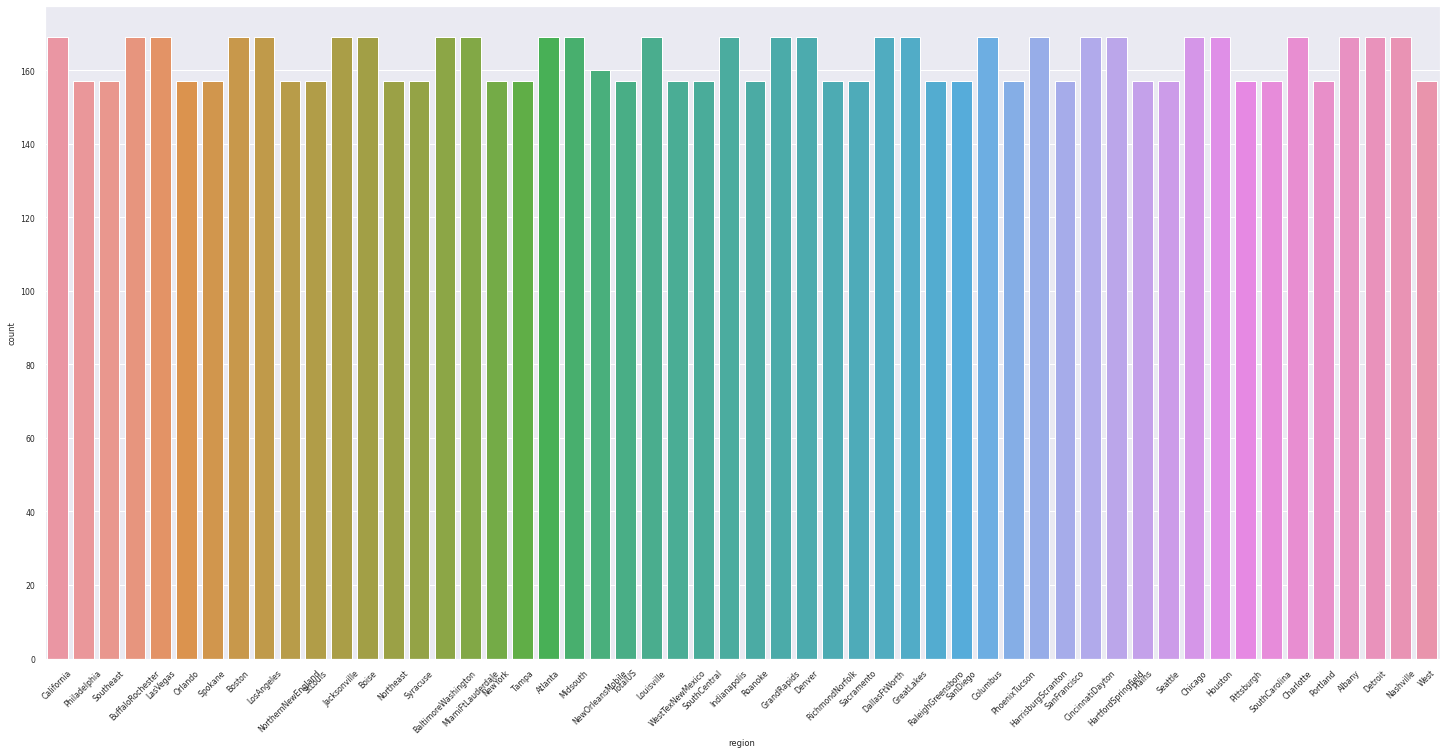

In [17]:
sns.set(font_scale=0.7)
plt.figure(figsize=[25,12])
sns.countplot(x='region', data=avocado_csv)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

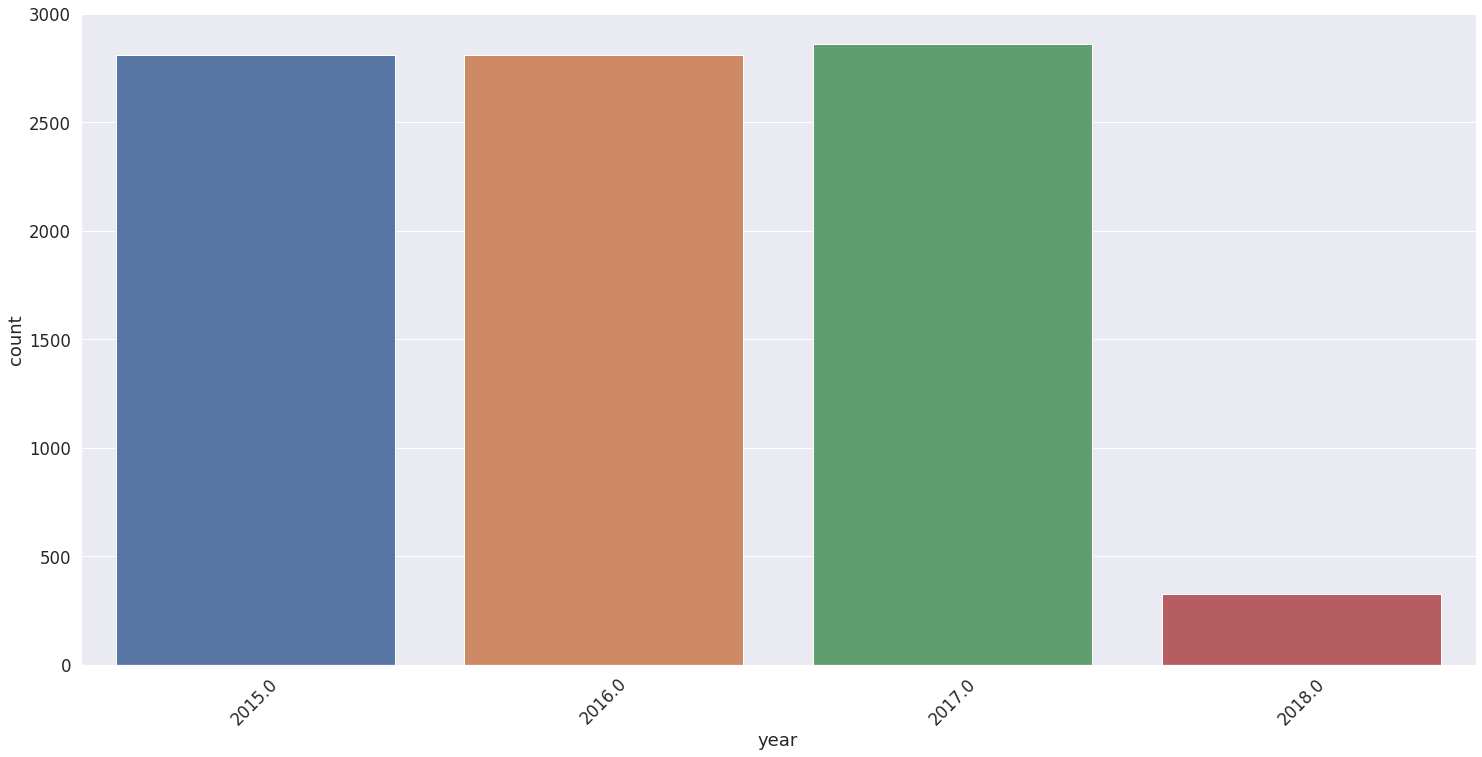

In [18]:
sns.set(font_scale=1.5)
plt.figure(figsize=[25,12])
sns.countplot(x='year', data=avocado_csv)
plt.xticks(rotation=45)

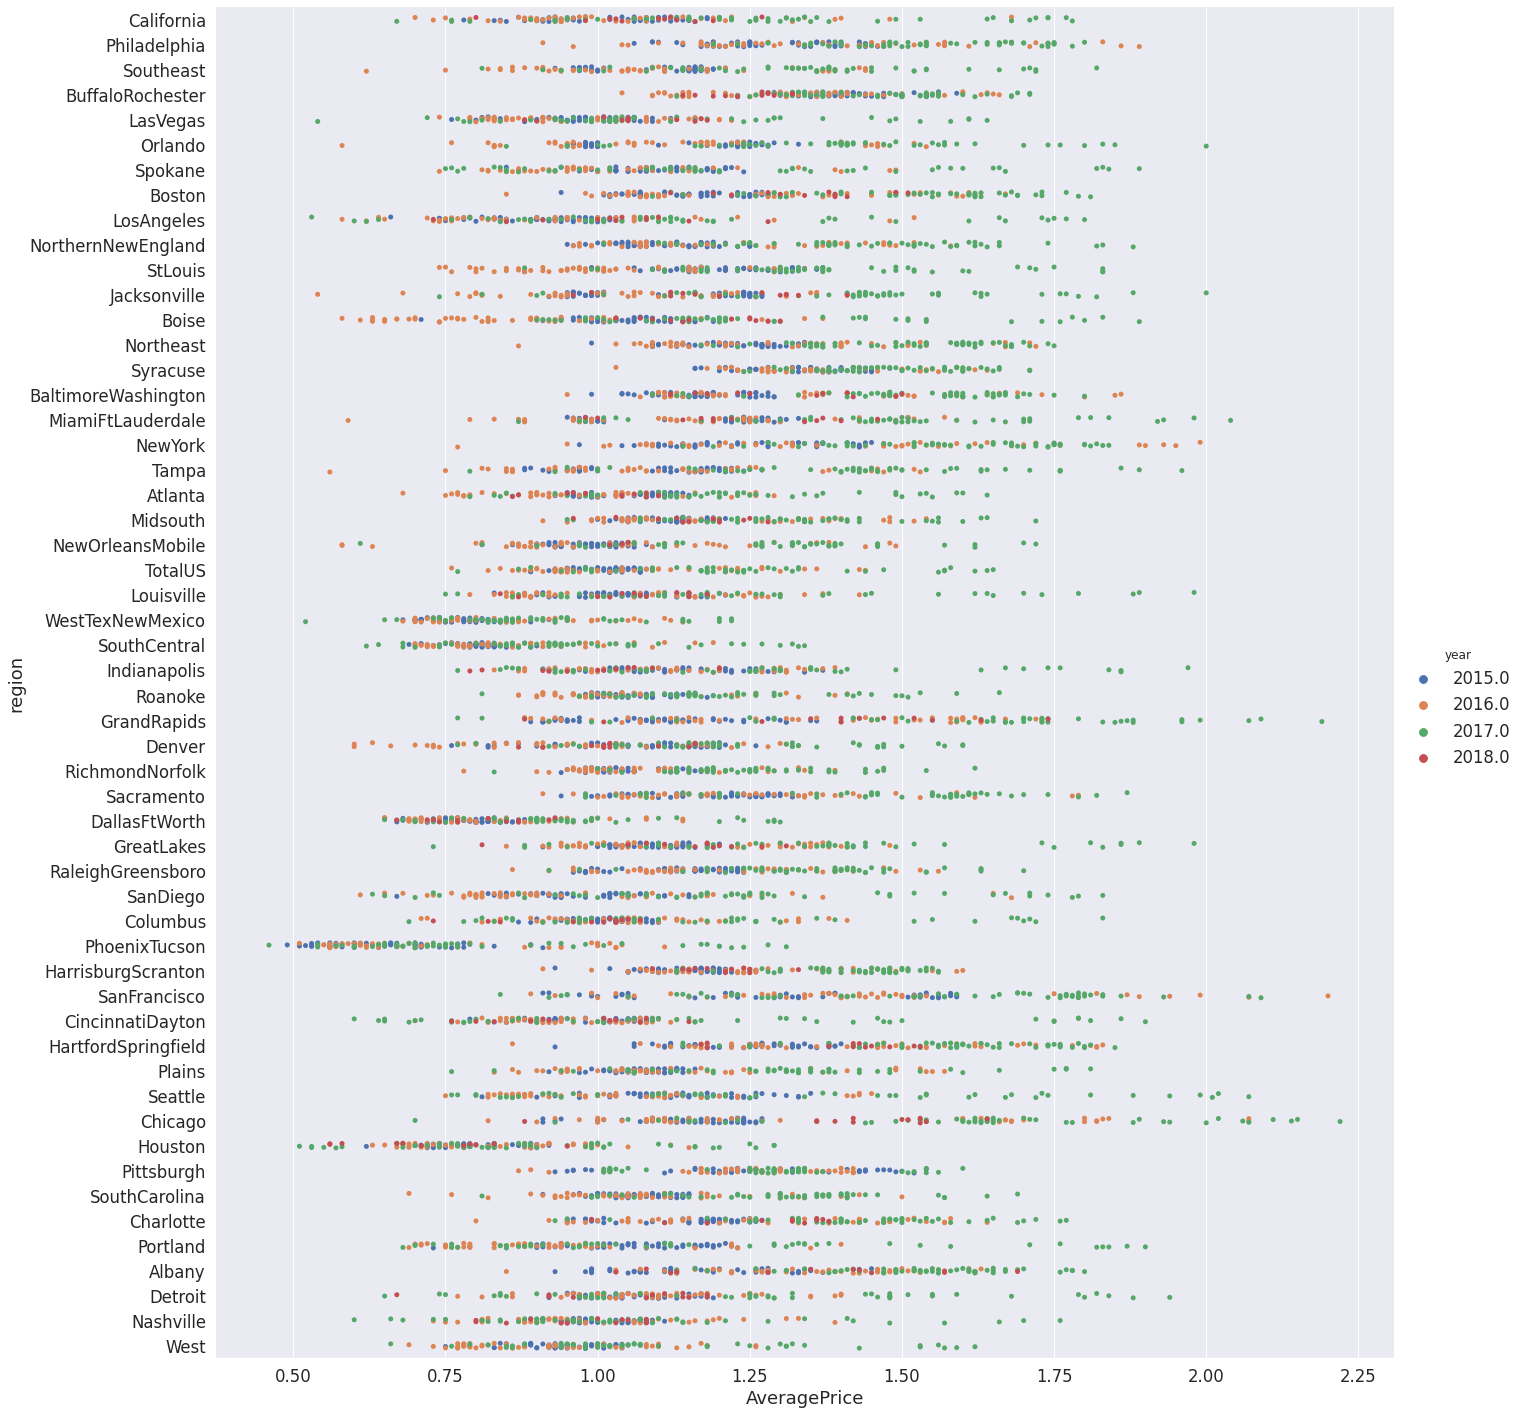

In [21]:
conventional = sns.catplot('AveragePrice', 'region', data=avocado_csv[avocado_csv['type']=='conventional'], hue='year', height=20)

In [25]:
avocado_csv

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
363,51,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015.0,California
1715,51,2015-01-04,1.10,407675.56,24190.91,294715.33,2121.45,86647.87,72829.94,13817.93,0.00,conventional,2015.0,Philadelphia
2443,51,2015-01-04,0.98,3204112.16,2296069.27,320373.63,18938.42,568730.84,287820.14,280910.70,0.00,conventional,2015.0,Southeast
311,51,2015-01-04,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.00,conventional,2015.0,BuffaloRochester
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015.0,LasVegas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,0,2018-03-25,1.02,950483.37,176286.79,222958.27,16540.62,534697.69,121655.40,413042.29,0.00,conventional,2018.0,Denver
8550,0,2018-03-25,1.04,6687009.44,1932162.02,2715163.60,92955.04,1946728.78,1827362.50,37434.21,81932.07,conventional,2018.0,California
8562,0,2018-03-25,1.32,258547.55,68088.95,87220.18,5567.45,97670.97,92743.21,4926.65,1.11,conventional,2018.0,Charlotte
8502,0,2018-03-25,1.23,986038.75,108250.52,591934.75,4205.03,281648.45,277508.08,2777.04,1363.33,conventional,2018.0,BaltimoreWashington


In [26]:
avocado_prophet = avocado_csv[['Date', 'AveragePrice']]

In [27]:
avocado_prophet

,Date,AveragePrice
363,2015-01-04,0.93
1715,2015-01-04,1.10
2443,2015-01-04,0.98
311,2015-01-04,1.40
1143,2015-01-04,0.80
...,...,...
8622,2018-03-25,1.02
8550,2018-03-25,1.04
8562,2018-03-25,1.32
8502,2018-03-25,1.23


In [28]:
avocado_prophet = avocado_prophet.rename(columns={'Date':'ds', 'AveragePrice': 'y'})

In [29]:
avocado_prophet

,ds,y
363,2015-01-04,0.93
1715,2015-01-04,1.10
2443,2015-01-04,0.98
311,2015-01-04,1.40
1143,2015-01-04,0.80
...,...,...
8622,2018-03-25,1.02
8550,2018-03-25,1.04
8562,2018-03-25,1.32
8502,2018-03-25,1.23


In [30]:
m = Prophet()

In [31]:
m.fit(avocado_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future = m.make_future_dataframe(periods = 365)
forcast = m.predict(future)

In [34]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.250858,0.831079,1.400955,1.250858,1.250858,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,0.0,0.0,0.0,1.116158
1,2015-01-04,1.250858,0.826702,1.408244,1.250858,1.250858,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,0.0,0.0,0.0,1.116158
2,2015-01-04,1.250858,0.843551,1.375540,1.250858,1.250858,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,0.0,0.0,0.0,1.116158
3,2015-01-04,1.250858,0.849065,1.368959,1.250858,1.250858,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,0.0,0.0,0.0,1.116158
4,2015-01-04,1.250858,0.844602,1.393565,1.250858,1.250858,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,-0.134700,0.0,0.0,0.0,1.116158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,2019-03-21,1.099574,0.568825,1.505635,0.725841,1.487426,-0.070590,-0.070590,-0.070590,-0.070590,-0.070590,-0.070590,0.0,0.0,0.0,1.028984
9167,2019-03-22,1.099198,0.576578,1.497846,0.724421,1.488952,-0.069666,-0.069666,-0.069666,-0.069666,-0.069666,-0.069666,0.0,0.0,0.0,1.029532
9168,2019-03-23,1.098821,0.565830,1.507088,0.722030,1.489970,-0.068353,-0.068353,-0.068353,-0.068353,-0.068353,-0.068353,0.0,0.0,0.0,1.030469
9169,2019-03-24,1.098445,0.565908,1.498387,0.719703,1.490384,-0.066661,-0.066661,-0.066661,-0.066661,-0.066661,-0.066661,0.0,0.0,0.0,1.031784


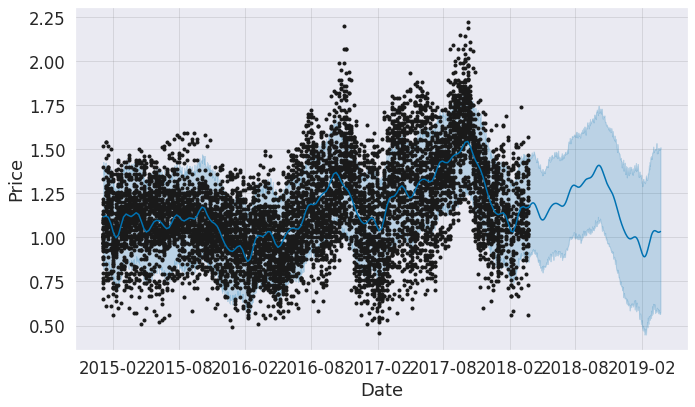

In [36]:
figure = m.plot(forcast,xlabel='Date', ylabel='Price')

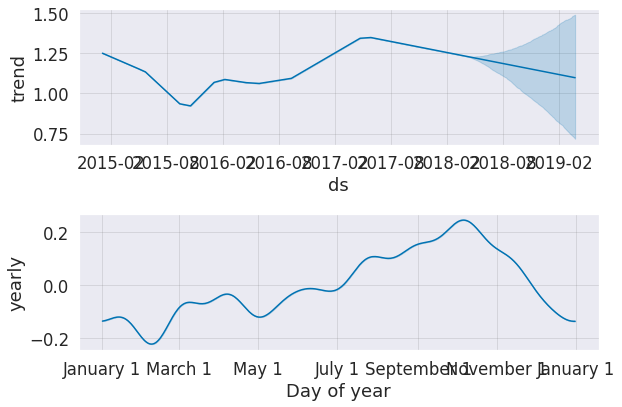

In [37]:
figure2 = m.plot_components(forcast)

In [38]:
avocado_sample = avocado_csv[avocado_csv['region']=='West']

In [39]:
avocado_sample = avocado_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


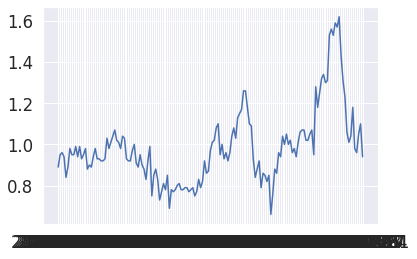

In [40]:
plt.plot(avocado_sample['Date'], avocado_sample['AveragePrice'])

In [41]:
avocado_sample = avocado_sample.rename(columns={'Date':'ds', 'AveragePrice': 'y'})

In [43]:
m = Prophet()
m.fit(avocado_sample)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future = m.make_future_dataframe(periods = 365)
forcast = m.predict(future)

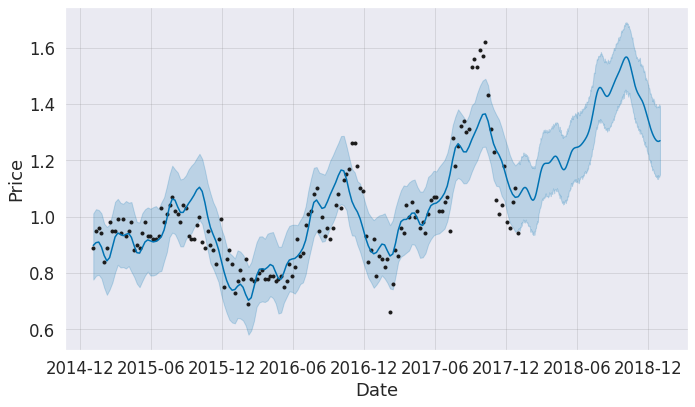

In [45]:
figure = m.plot(forcast,xlabel='Date', ylabel='Price')

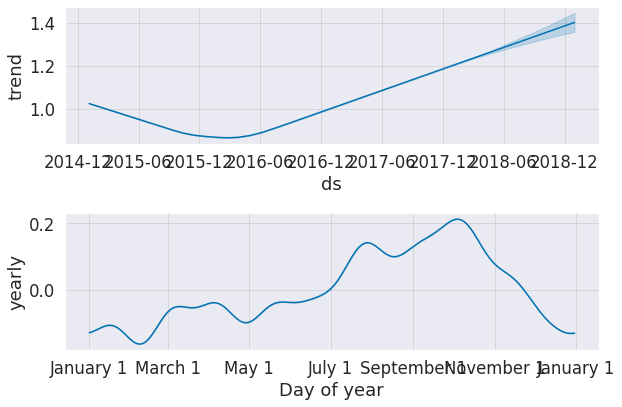

In [46]:
figure2 = m.plot_components(forcast)